<a href="https://colab.research.google.com/github/DataEtnos/estudos_python/blob/main/C%C3%B3pia_de_Aula_pr%C3%A1tica_Dummy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
#Importe o arquivo formato xlsx
limite = pd.read_excel("Limite_Credito.xlsx")
limite.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial,Escolaridade
0,70,10736,5214,400,500,Fundamental_Medio
1,68,5000,5000,380,600,Fundamental_Medio
2,44,5800,5800,500,800,Fundamental_Medio
3,72,4300,4300,2000,1000,Fundamental_Medio
4,75,4400,4400,3000,1000,Fundamental_Medio


In [ ]:
limite = pd.get_dummies(limite, prefix=['Escolaridade'])


In [ ]:
limite.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial,Escolaridade_Fundamental_Medio,Escolaridade_Superior_Pos
0,70,10736,5214,400,500,True,False
1,68,5000,5000,380,600,True,False
2,44,5800,5800,500,800,True,False
3,72,4300,4300,2000,1000,True,False
4,75,4400,4400,3000,1000,True,False


In [ ]:
limite.corr()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial,Escolaridade_Fundamental_Medio,Escolaridade_Superior_Pos
Idade,1.000000,0.066396,0.063227,0.064149,0.075883,-0.110892,0.110892
RendimentoTotal,0.066396,1.000000,0.960551,0.031041,0.858120,-0.396191,0.396191
Salario,0.063227,0.960551,1.000000,0.081792,0.888839,-0.475479,0.475479
LimitedeCreditoImediato,0.064149,0.031041,0.081792,1.000000,0.226990,-0.259433,0.259433
LimitedoChequeEspecial,0.075883,0.858120,0.888839,0.226990,1.000000,-0.598310,0.598310
Escolaridade_Fundamental_Medio,-0.110892,-0.396191,-0.475479,-0.259433,-0.598310,1.000000,-1.000000
Escolaridade_Superior_Pos,0.110892,0.396191,0.475479,0.259433,0.598310,-1.000000,1.000000


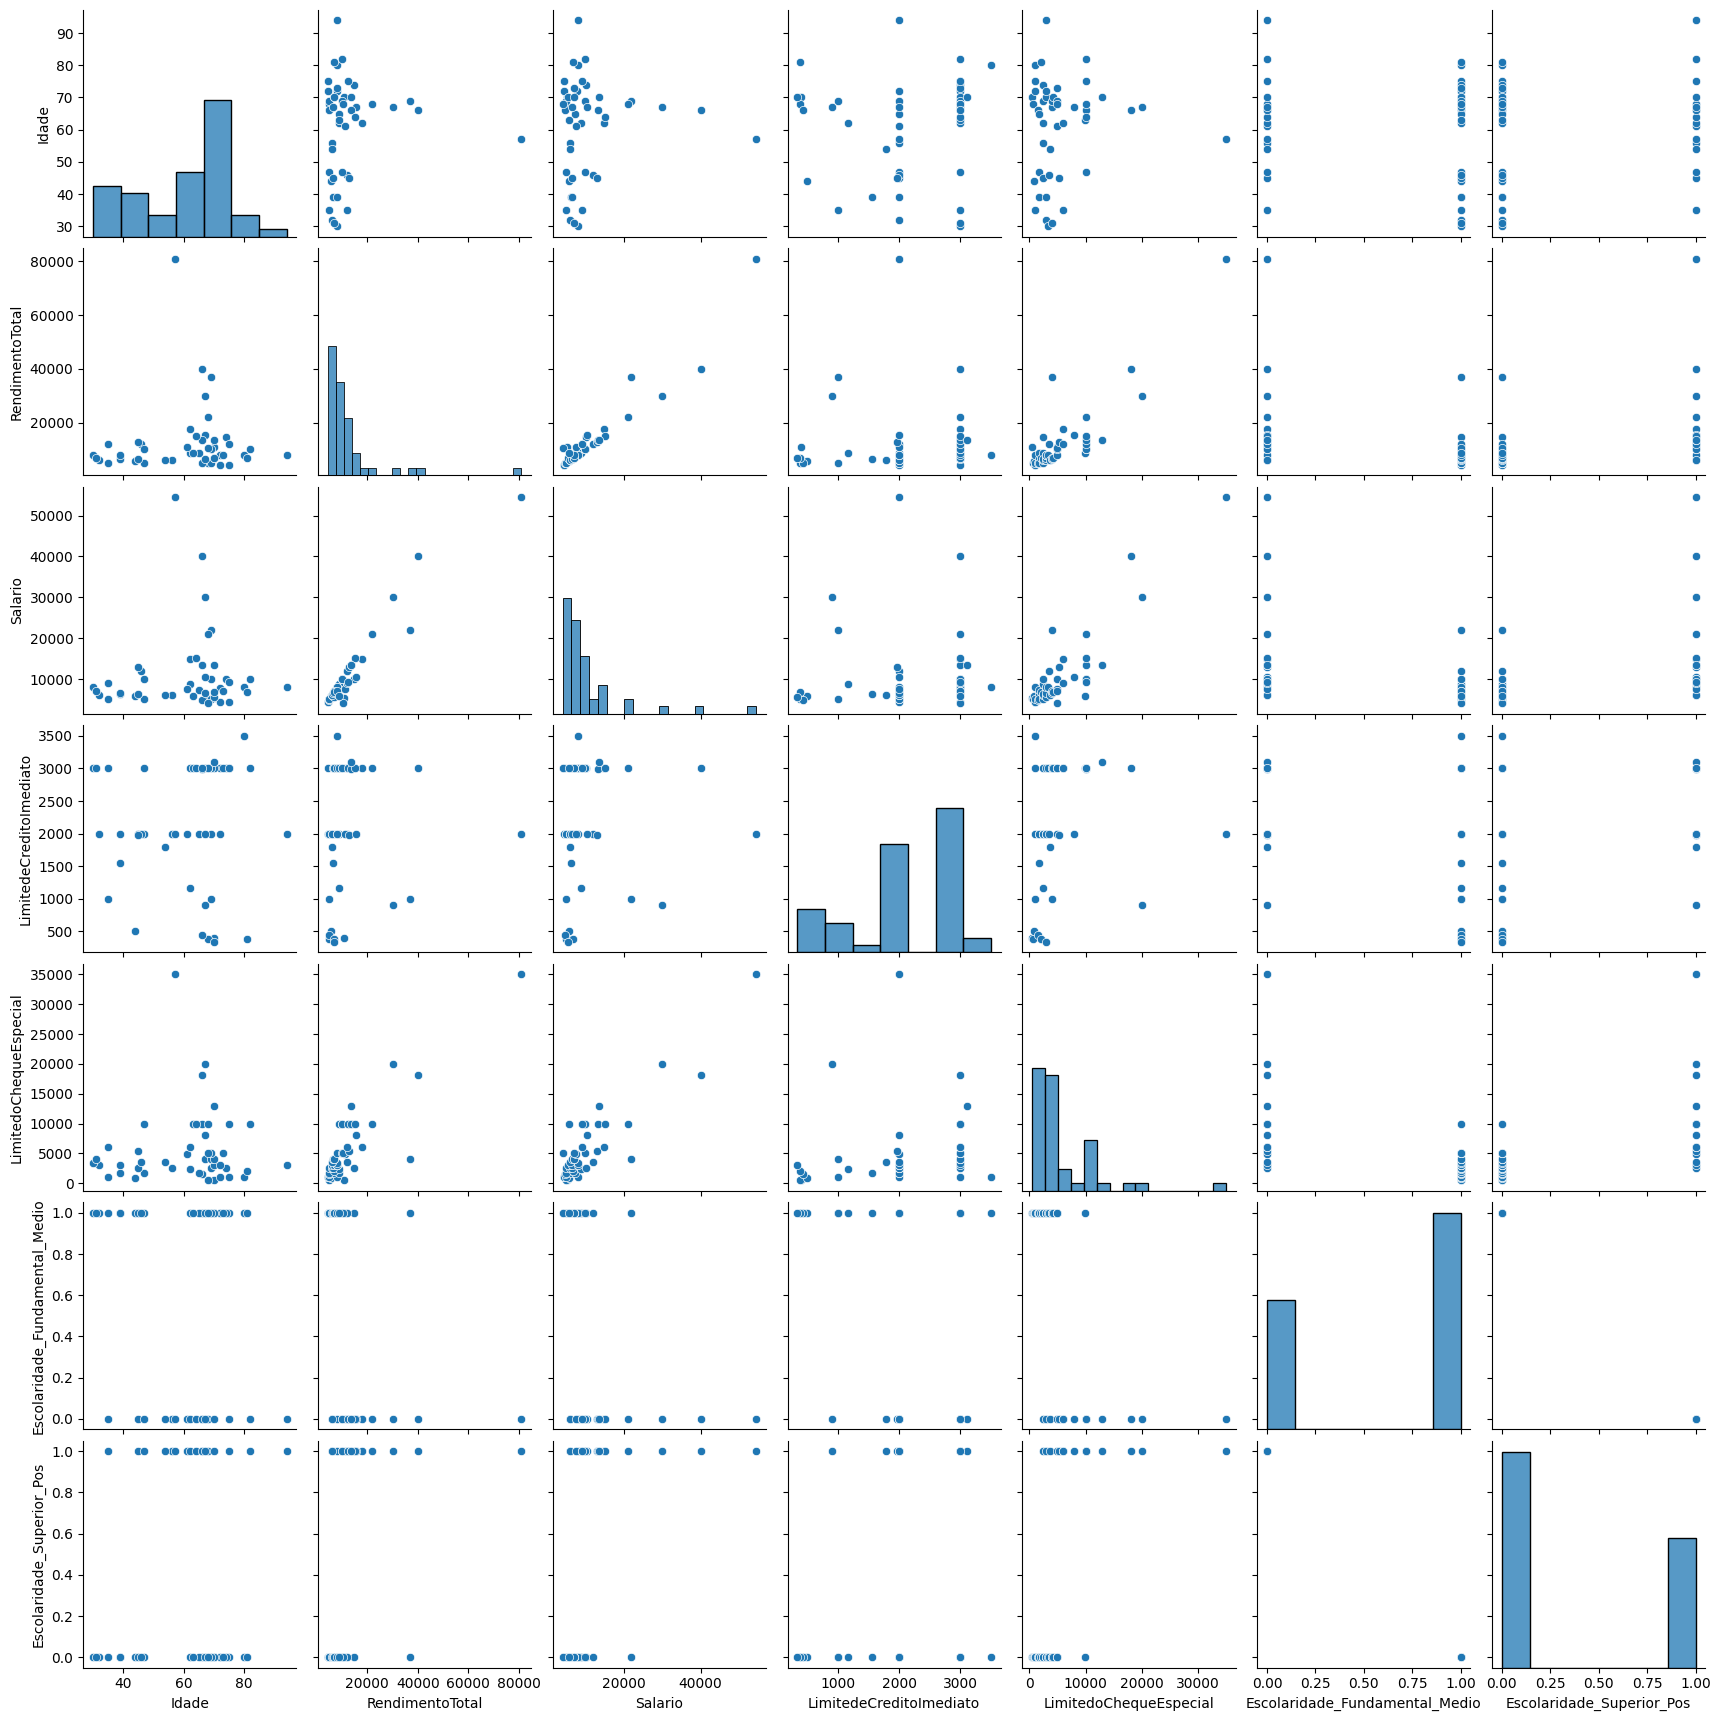

In [ ]:
sns.pairplot(limite)

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
#modelo MRLS
function = 'LimitedoChequeEspecial~Idade+RendimentoTotal+Salario+LimitedeCreditoImediato+Escolaridade_Fundamental_Medio+Escolaridade_Superior_Pos'
model = smf.ols(formula=function, data=limite).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.848
Model:                                OLS   Adj. R-squared:                  0.830
Method:                     Least Squares   F-statistic:                     46.89
Date:                    Thu, 06 Jun 2024   Prob (F-statistic):           4.07e-16
Time:                            23:06:56   Log-Likelihood:                -441.00
No. Observations:                      48   AIC:                             894.0
Df Residuals:                          42   BIC:                             905.2
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [ ]:
#modelo MRLS
function = 'LimitedoChequeEspecial~RendimentoTotal+Salario+LimitedeCreditoImediato+Escolaridade_Fundamental_Medio+Escolaridade_Superior_Pos-1'
model = smf.ols(formula=function, data=limite).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.848
Model:                                OLS   Adj. R-squared:                  0.834
Method:                     Least Squares   F-statistic:                     59.99
Date:                    Thu, 06 Jun 2024   Prob (F-statistic):           4.92e-17
Time:                            23:06:56   Log-Likelihood:                -441.01
No. Observations:                      48   AIC:                             892.0
Df Residuals:                          43   BIC:                             901.4
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [ ]:
#modelo MRLS
function = 'LimitedoChequeEspecial~RendimentoTotal+Salario+LimitedeCreditoImediato+Escolaridade_Fundamental_Medio-1'
model = smf.ols(formula=function, data=limite).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.848
Model:                                OLS   Adj. R-squared:                  0.834
Method:                     Least Squares   F-statistic:                     59.99
Date:                    Thu, 06 Jun 2024   Prob (F-statistic):           4.92e-17
Time:                            23:06:56   Log-Likelihood:                -441.01
No. Observations:                      48   AIC:                             892.0
Df Residuals:                          43   BIC:                             901.4
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [ ]:
#modelo MRLS
function = 'LimitedoChequeEspecial~Salario+LimitedeCreditoImediato+Escolaridade_Fundamental_Medio-1'
model = smf.ols(formula=function, data=limite).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.842
Model:                                OLS   Adj. R-squared:                  0.831
Method:                     Least Squares   F-statistic:                     77.92
Date:                    Thu, 06 Jun 2024   Prob (F-statistic):           1.23e-17
Time:                            23:06:56   Log-Likelihood:                -442.00
No. Observations:                      48   AIC:                             892.0
Df Residuals:                          44   BIC:                             899.5
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------